### Mounting the google drive

Using Google drive as the directory to handle files


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


location of the dataset

click the folder icon on the left side of the colab notebook. Go to drive to locate your file and get the path of the national grid data locaated in the drive and paste it hear upto the folder which contains the file. the link given here is f'/content/drive/MyDrive/OFFICE/fNew {YEAR} {MONTH}.csv'. copy the link and paste it till the OFFICE/

In [3]:
YEAR = int(input('Enter the year for finding the Dataset ---> '))
MONTH = int(input('Enter the month for finding the Dataset---> '))

Enter the year for finding the Dataset ---> 2022
Enter the month for finding the Dataset---> 01


**Input the year and the month to select the dataset**

In [4]:
dataset = f'/content/drive/MyDrive/OFFICE/fnew-2022-2/fNew {YEAR} {MONTH}.csv'

In [5]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import statistics
import numpy


**Printing the variables**

In [6]:
df = pd.read_csv(dataset)
for i in (df[:0]):
  print(i)

dtm
f


In [7]:
df['f']
data_to_list = []
for entities in df['f']:
  data_to_list.append(entities)


In [8]:
M = df['f'].mean()
print(f'the mean of the frequencies is {M}')
STD = df['f'].std()
print(f'the std of the frequencies is {STD}')

the mean of the frequencies is 49.999626800326524
the std of the frequencies is 0.06650229501917782


In [ ]:
def pdf(x):
    mean = np.mean(x)
    std = np.std(x)
    y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))
    return y_out

### Normal distribtion function (PDF curve)


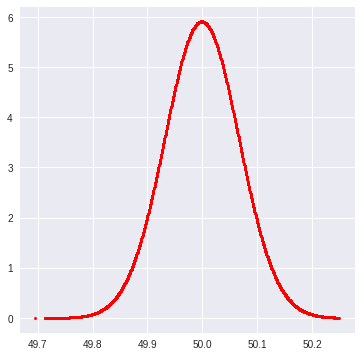

In [ ]:
plt.style.use('seaborn')
plt.figure(figsize = (6, 6))
# plt.plot(data_to_list, y, color = 'black',
#          linestyle = 'dashed')
  
plt.scatter( data_to_list, pdf(data_to_list), marker = 'o', s = 5, color = 'red')
# plt.fill_between(data_to_list, 
#                  pdf(data_to_list) ,
#                  facecolor='blue',
#                  alpha=0.35)
plt.show()

In [9]:
from scipy.integrate import quad

**Enter the x and y value to get the percentage of values that lies in the bell curve **

```
result, _ = quad(gaus_dist_func, x, y)
result_1, _1 = quad(gaus_dist_func, x, y)
```



In [10]:
def gaus_dist_func(x):
  return(1/(0.06750069609422339 * np.sqrt(2 * np.pi)) * np.exp( - (x - 49.99878943617802)**2 / (2 * 0.06750069609422339**2)))

result, _ = quad(gaus_dist_func, 49.9, 50.1)
result_1, _1 = quad(gaus_dist_func, 49.8, 50.2)
print(f'{result*100} percentage of the values lies in 1 STD')
print(f'{result_1*100} percentage of the values lies in 2 STD')

86.1454174801567 percentage of the values lies in 1 STD
99.69480475617051 percentage of the values lies in 2 STD


In [ ]:
df['f'].describe().transpose()

count    2.419200e+06
mean     4.999879e+01
std      6.750070e-02
min      4.969500e+01
25%      4.994900e+01
50%      5.000000e+01
75%      5.004700e+01
max      5.025000e+01
Name: f, dtype: float64

In [ ]:
def pdf_2(x):
  constant = 1.0 / np.sqrt(2*np.pi)
  pdf_normal_distribution = constant * np.exp(-(np.power(x,2)) / 2.0)
  return pdf_normal_distribution

### Normal distribution function

In [ ]:
df[['Date','time']] = df.dtm.str.split(" ",expand=True,)

In [ ]:
list_of_vals = []


In [ ]:
list_of_vals.clear()
for num in range (len(df)):
  num_1 = df['f'][num]
  try:
    num_2 = df['f'][num+1]
  except:
    KeyError
  value = np.subtract(num_1, num_2)
  list_of_vals.append(value)
  

In [ ]:
len(list_of_vals)
df[['deadband']] = pd.DataFrame(list_of_vals)

In [ ]:
df['f'][1]-df['f'][2]

0.018000000000000682

In [ ]:
df

,dtm,f,Date,time,deadband
0,2022-02-01 00:00:00,50.102,2022-02-01,00:00:00,0.015
1,2022-02-01 00:00:01,50.087,2022-02-01,00:00:01,0.018
2,2022-02-01 00:00:02,50.069,2022-02-01,00:00:02,0.015
3,2022-02-01 00:00:03,50.054,2022-02-01,00:00:03,0.010
4,2022-02-01 00:00:04,50.044,2022-02-01,00:00:04,0.003
...,...,...,...,...,...
2419195,2022-02-28 23:59:55,50.064,2022-02-28,23:59:55,0.001
2419196,2022-02-28 23:59:56,50.063,2022-02-28,23:59:56,0.000
2419197,2022-02-28 23:59:57,50.063,2022-02-28,23:59:57,0.000
2419198,2022-02-28 23:59:58,50.063,2022-02-28,23:59:58,-0.002


In [ ]:
df['failure'] = df['deadband'].apply(lambda x: 1 if (abs(x)>0.015) else 0)


In [ ]:
df

,dtm,f,Date,time,deadband,failure
0,2022-02-01 00:00:00,50.102,2022-02-01,00:00:00,0.015,0
1,2022-02-01 00:00:01,50.087,2022-02-01,00:00:01,0.018,1
2,2022-02-01 00:00:02,50.069,2022-02-01,00:00:02,0.015,1
3,2022-02-01 00:00:03,50.054,2022-02-01,00:00:03,0.010,0
4,2022-02-01 00:00:04,50.044,2022-02-01,00:00:04,0.003,0
...,...,...,...,...,...,...
2419195,2022-02-28 23:59:55,50.064,2022-02-28,23:59:55,0.001,0
2419196,2022-02-28 23:59:56,50.063,2022-02-28,23:59:56,0.000,0
2419197,2022-02-28 23:59:57,50.063,2022-02-28,23:59:57,0.000,0
2419198,2022-02-28 23:59:58,50.063,2022-02-28,23:59:58,-0.002,0


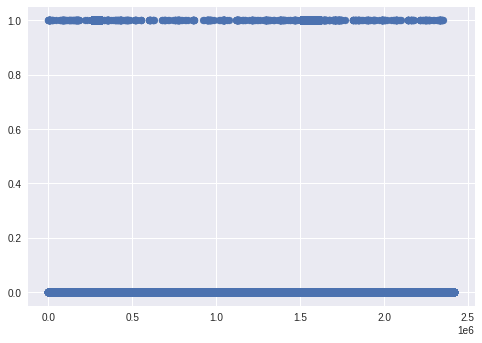

In [ ]:
plt.scatter([x for x in range (len(df))], df['failure'] )

count    2.419200e+06
mean     1.529431e-08
std      3.568213e-03
min     -1.000000e-01
25%     -2.000000e-03
50%      0.000000e+00
75%      2.000000e-03
max      1.340000e-01
Name: deadband, dtype: float64


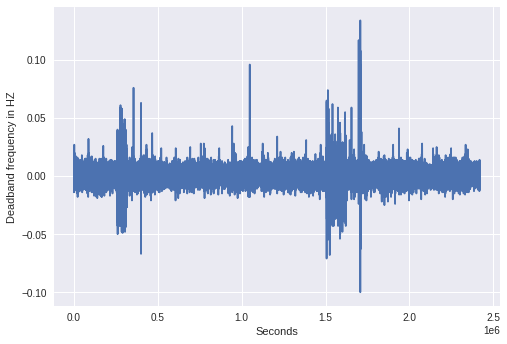

In [ ]:
plt.plot([x for x in range (len(df))],df['deadband'])
plt.xlabel('Seconds')
plt.ylabel('Deadband frequency in HZ')
print(df['deadband'].describe())

In [ ]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [ ]:
for num in range (len(df)):
  pass

In [ ]:
format = '%Y-%m-%d'

In [ ]:

x = 0
for i in df['Date']:

  if i == '2022-02-04':
    x+=1
print(f'Number of datas in one day is:- {x}')

Number of datas in one day is:- 86400


In [ ]:
val = len(df['dtm'])

In [ ]:
sec = []
for num in range (len(df['dtm'])):
  sec.append(num)

In [ ]:
len(sec)

2419200

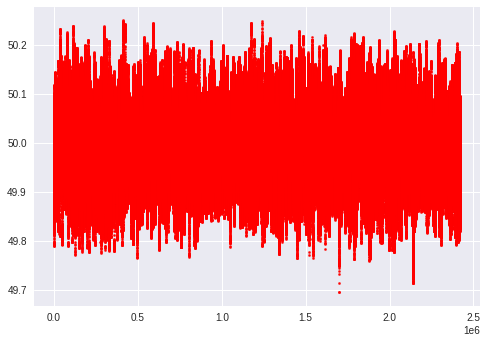

In [ ]:
plt.scatter(sec, data_to_list, marker = 'o', s = 5, color = 'red')
plt.show()

[50.102, 50.087, 50.069, 50.054, 50.044, 50.041, 50.041, 50.042, 50.039, 50.034, 50.03, 50.025, 50.02, 50.02, 50.018, 50.017, 50.019, 50.021, 50.026, 50.032, 50.037, 50.039, 50.04, 50.042, 50.042, 50.04, 50.042, 50.044, 50.046, 50.049, 50.05, 50.053, 50.054, 50.056, 50.056, 50.058, 50.058, 50.058, 50.055, 50.052, 50.045, 50.041, 50.038, 50.034, 50.027, 50.021, 50.014, 50.013, 50.012, 50.015, 50.015, 50.013, 50.013, 50.013, 50.014, 50.015, 50.016, 50.012, 50.006, 50.001, 49.994, 49.986, 49.978, 49.97, 49.965, 49.962, 49.963, 49.965, 49.967, 49.966, 49.967, 49.966, 49.967, 49.967, 49.963, 49.957, 49.952, 49.95, 49.951, 49.947, 49.945, 49.945, 49.947, 49.95, 49.954, 49.955, 49.959, 49.962, 49.967, 49.969, 49.969, 49.967, 49.966, 49.968, 49.969, 49.971, 49.974, 49.974, 49.972, 49.971, 49.968, 49.967, 49.965, 49.963, 49.962, 49.958, 49.953, 49.95, 49.949, 49.963, 49.949, 49.949, 49.951, 49.955, 49.957, 49.958, 49.96, 49.962, 49.961, 49.961, 49.957, 49.951, 49.948, 49.944, 49.942, 49.942, 49

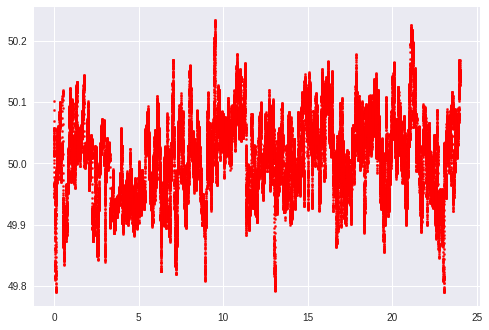

In [ ]:
increment = 0
date_1 = []
while df['Date'][increment] == '2022-02-01':
  date_1.append(df['f'][increment])
  increment+=1
print(date_1)
plt.scatter([x for x in np.linspace(0, 24.0, num=len(date_1))], date_1, marker = 'o', s = 5, color = 'red')


### Bell curve generation for different days

Get the mean, max and std of each month

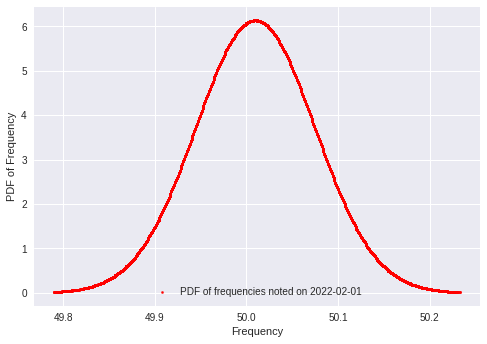

count    2.419200e+06
mean     4.999879e+01
std      6.750070e-02
min      4.969500e+01
25%      4.994900e+01
50%      5.000000e+01
75%      5.004700e+01
max      5.025000e+01
Name: f, dtype: float64


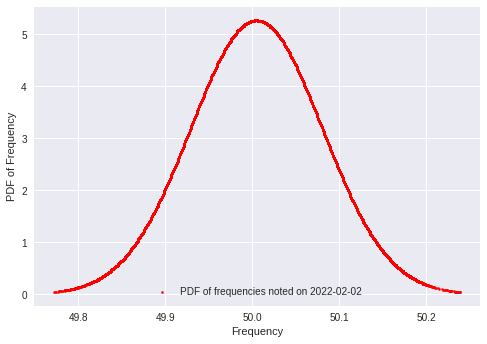

count    2.419200e+06
mean     4.999879e+01
std      6.750070e-02
min      4.969500e+01
25%      4.994900e+01
50%      5.000000e+01
75%      5.004700e+01
max      5.025000e+01
Name: f, dtype: float64


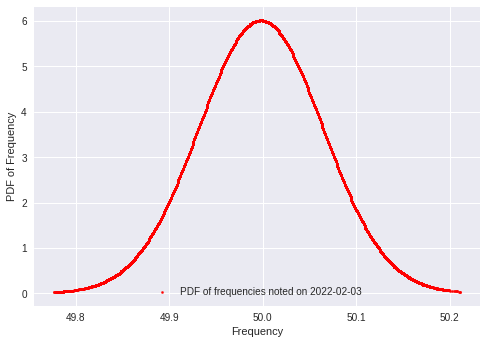

count    2.419200e+06
mean     4.999879e+01
std      6.750070e-02
min      4.969500e+01
25%      4.994900e+01
50%      5.000000e+01
75%      5.004700e+01
max      5.025000e+01
Name: f, dtype: float64


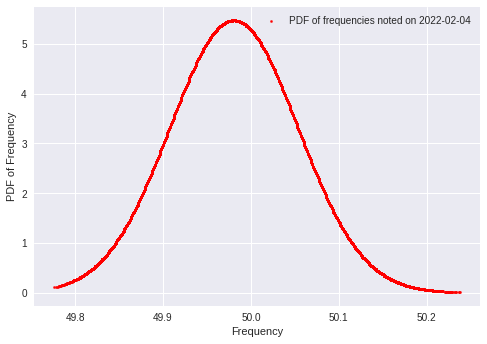

count    2.419200e+06
mean     4.999879e+01
std      6.750070e-02
min      4.969500e+01
25%      4.994900e+01
50%      5.000000e+01
75%      5.004700e+01
max      5.025000e+01
Name: f, dtype: float64


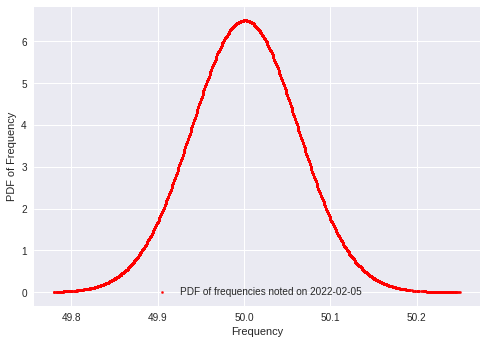

count    2.419200e+06
mean     4.999879e+01
std      6.750070e-02
min      4.969500e+01
25%      4.994900e+01
50%      5.000000e+01
75%      5.004700e+01
max      5.025000e+01
Name: f, dtype: float64


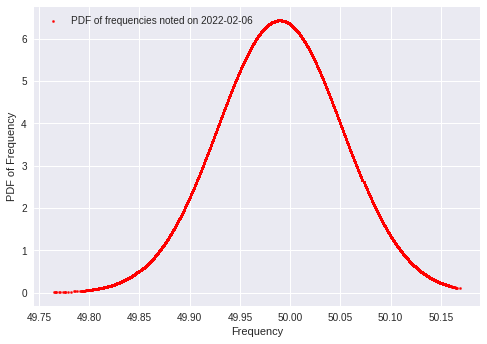

count    2.419200e+06
mean     4.999879e+01
std      6.750070e-02
min      4.969500e+01
25%      4.994900e+01
50%      5.000000e+01
75%      5.004700e+01
max      5.025000e+01
Name: f, dtype: float64


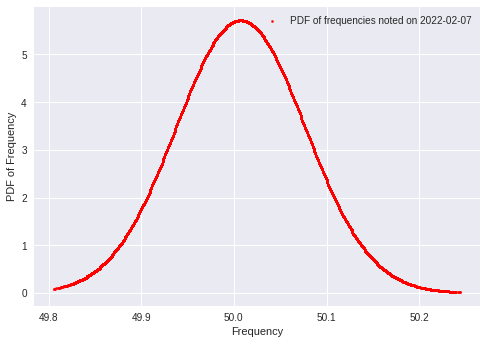

count    2.419200e+06
mean     4.999879e+01
std      6.750070e-02
min      4.969500e+01
25%      4.994900e+01
50%      5.000000e+01
75%      5.004700e+01
max      5.025000e+01
Name: f, dtype: float64


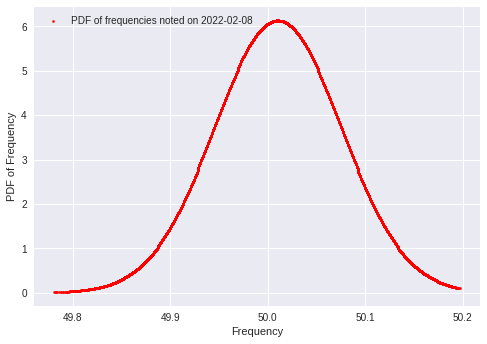

count    2.419200e+06
mean     4.999879e+01
std      6.750070e-02
min      4.969500e+01
25%      4.994900e+01
50%      5.000000e+01
75%      5.004700e+01
max      5.025000e+01
Name: f, dtype: float64


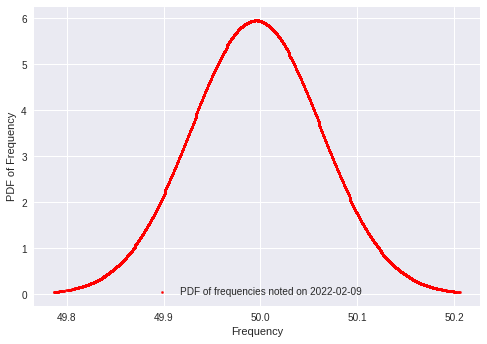

count    2.419200e+06
mean     4.999879e+01
std      6.750070e-02
min      4.969500e+01
25%      4.994900e+01
50%      5.000000e+01
75%      5.004700e+01
max      5.025000e+01
Name: f, dtype: float64


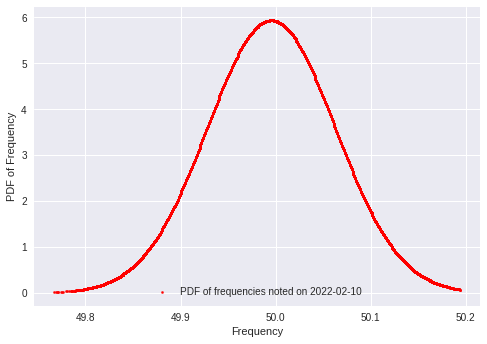

count    2.419200e+06
mean     4.999879e+01
std      6.750070e-02
min      4.969500e+01
25%      4.994900e+01
50%      5.000000e+01
75%      5.004700e+01
max      5.025000e+01
Name: f, dtype: float64


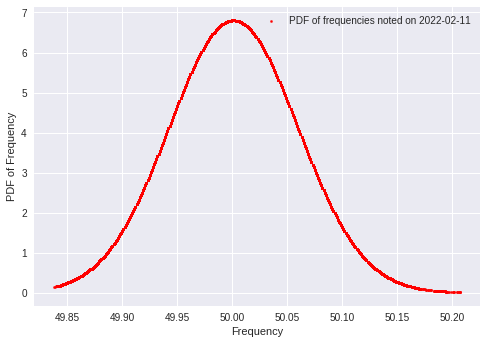

count    2.419200e+06
mean     4.999879e+01
std      6.750070e-02
min      4.969500e+01
25%      4.994900e+01
50%      5.000000e+01
75%      5.004700e+01
max      5.025000e+01
Name: f, dtype: float64


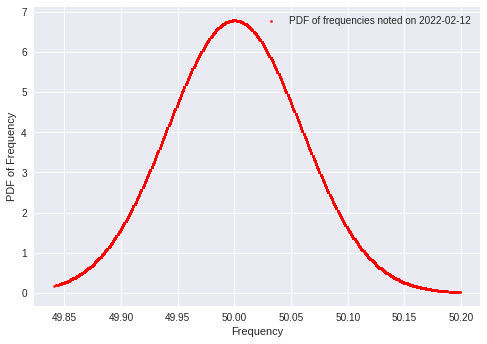

count    2.419200e+06
mean     4.999879e+01
std      6.750070e-02
min      4.969500e+01
25%      4.994900e+01
50%      5.000000e+01
75%      5.004700e+01
max      5.025000e+01
Name: f, dtype: float64


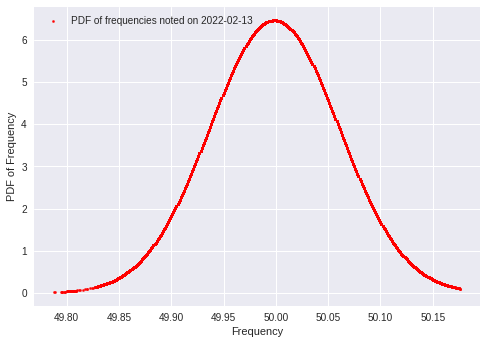

count    2.419200e+06
mean     4.999879e+01
std      6.750070e-02
min      4.969500e+01
25%      4.994900e+01
50%      5.000000e+01
75%      5.004700e+01
max      5.025000e+01
Name: f, dtype: float64


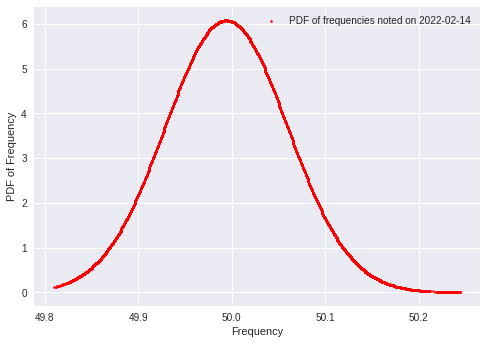

count    2.419200e+06
mean     4.999879e+01
std      6.750070e-02
min      4.969500e+01
25%      4.994900e+01
50%      5.000000e+01
75%      5.004700e+01
max      5.025000e+01
Name: f, dtype: float64


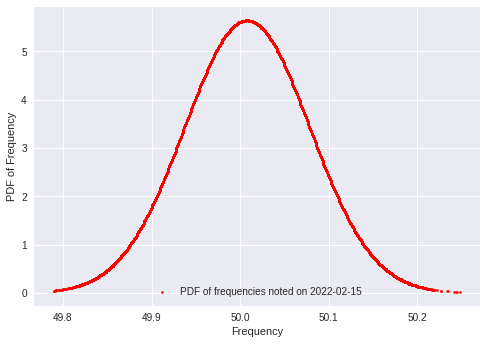

count    2.419200e+06
mean     4.999879e+01
std      6.750070e-02
min      4.969500e+01
25%      4.994900e+01
50%      5.000000e+01
75%      5.004700e+01
max      5.025000e+01
Name: f, dtype: float64


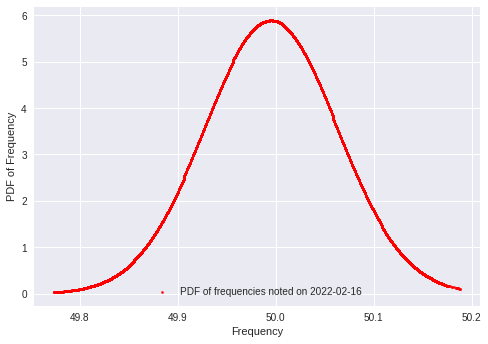

count    2.419200e+06
mean     4.999879e+01
std      6.750070e-02
min      4.969500e+01
25%      4.994900e+01
50%      5.000000e+01
75%      5.004700e+01
max      5.025000e+01
Name: f, dtype: float64


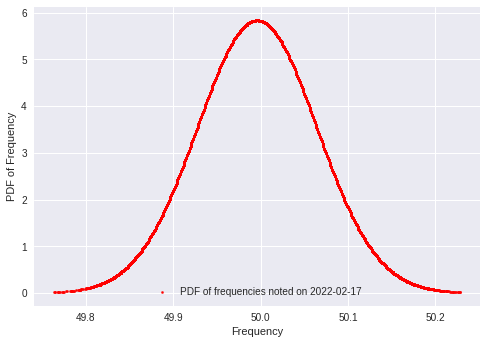

count    2.419200e+06
mean     4.999879e+01
std      6.750070e-02
min      4.969500e+01
25%      4.994900e+01
50%      5.000000e+01
75%      5.004700e+01
max      5.025000e+01
Name: f, dtype: float64


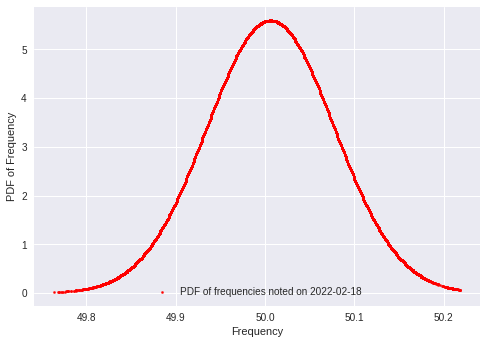

count    2.419200e+06
mean     4.999879e+01
std      6.750070e-02
min      4.969500e+01
25%      4.994900e+01
50%      5.000000e+01
75%      5.004700e+01
max      5.025000e+01
Name: f, dtype: float64


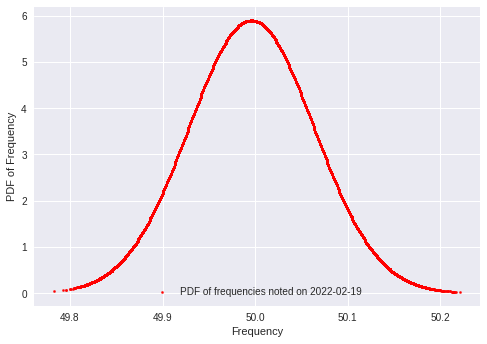

count    2.419200e+06
mean     4.999879e+01
std      6.750070e-02
min      4.969500e+01
25%      4.994900e+01
50%      5.000000e+01
75%      5.004700e+01
max      5.025000e+01
Name: f, dtype: float64


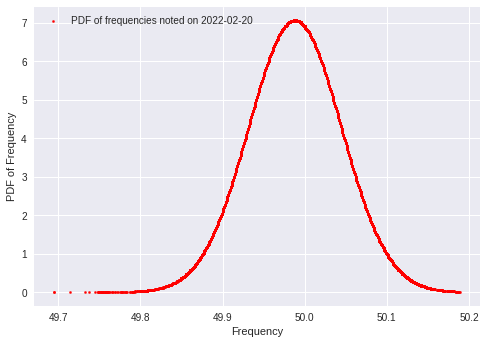

count    2.419200e+06
mean     4.999879e+01
std      6.750070e-02
min      4.969500e+01
25%      4.994900e+01
50%      5.000000e+01
75%      5.004700e+01
max      5.025000e+01
Name: f, dtype: float64


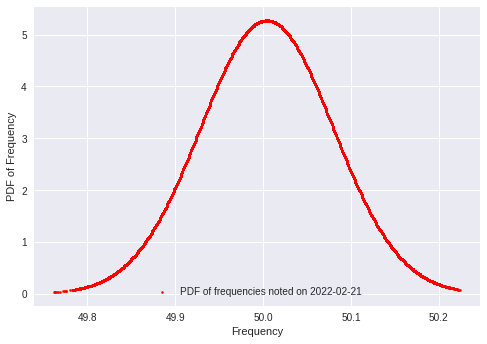

count    2.419200e+06
mean     4.999879e+01
std      6.750070e-02
min      4.969500e+01
25%      4.994900e+01
50%      5.000000e+01
75%      5.004700e+01
max      5.025000e+01
Name: f, dtype: float64


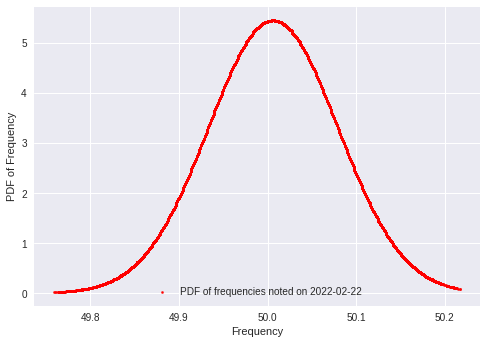

count    2.419200e+06
mean     4.999879e+01
std      6.750070e-02
min      4.969500e+01
25%      4.994900e+01
50%      5.000000e+01
75%      5.004700e+01
max      5.025000e+01
Name: f, dtype: float64


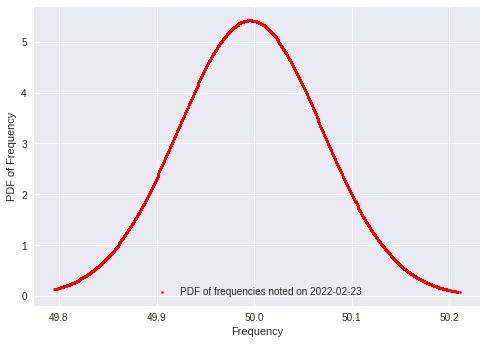

count    2.419200e+06
mean     4.999879e+01
std      6.750070e-02
min      4.969500e+01
25%      4.994900e+01
50%      5.000000e+01
75%      5.004700e+01
max      5.025000e+01
Name: f, dtype: float64


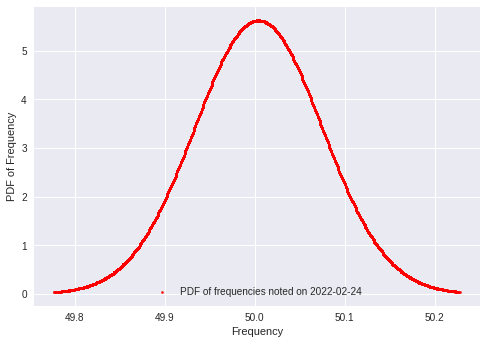

count    2.419200e+06
mean     4.999879e+01
std      6.750070e-02
min      4.969500e+01
25%      4.994900e+01
50%      5.000000e+01
75%      5.004700e+01
max      5.025000e+01
Name: f, dtype: float64


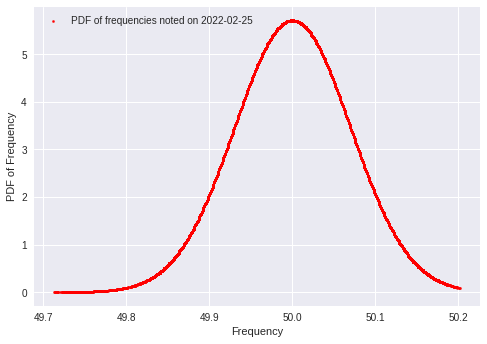

count    2.419200e+06
mean     4.999879e+01
std      6.750070e-02
min      4.969500e+01
25%      4.994900e+01
50%      5.000000e+01
75%      5.004700e+01
max      5.025000e+01
Name: f, dtype: float64


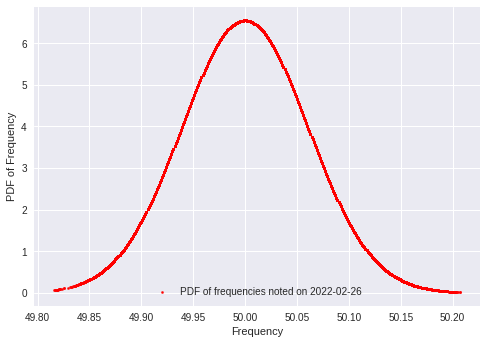

count    2.419200e+06
mean     4.999879e+01
std      6.750070e-02
min      4.969500e+01
25%      4.994900e+01
50%      5.000000e+01
75%      5.004700e+01
max      5.025000e+01
Name: f, dtype: float64


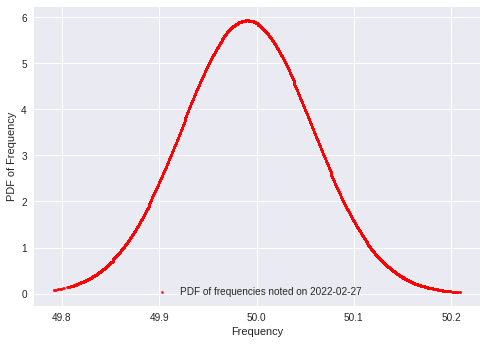

count    2.419200e+06
mean     4.999879e+01
std      6.750070e-02
min      4.969500e+01
25%      4.994900e+01
50%      5.000000e+01
75%      5.004700e+01
max      5.025000e+01
Name: f, dtype: float64


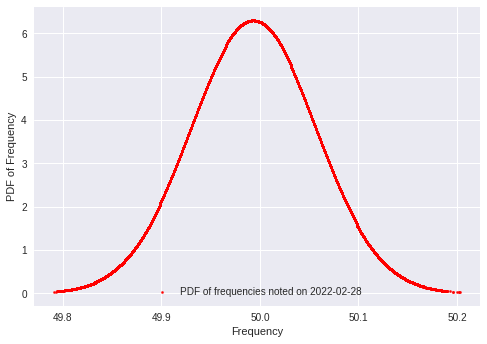

count    2.419200e+06
mean     4.999879e+01
std      6.750070e-02
min      4.969500e+01
25%      4.994900e+01
50%      5.000000e+01
75%      5.004700e+01
max      5.025000e+01
Name: f, dtype: float64


In [ ]:
no_of_dates = ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31']
for i in no_of_dates:
  try:
    dataset_sorted = df.groupby(['Date']).get_group((f"2022-02-{i}"))
    plt.scatter(dataset_sorted['f'], pdf(dataset_sorted['f']), marker = 'o', s = 5, color = 'red')
    plt.legend([f'PDF of frequencies noted on 2022-02-{i}'])
    plt.xlabel('Frequency')
    plt.ylabel('PDF of Frequency')
    plt.show()
    print(df['f'].describe().transpose())
  except:
    KeyError



# Frequency noted on different days in a month

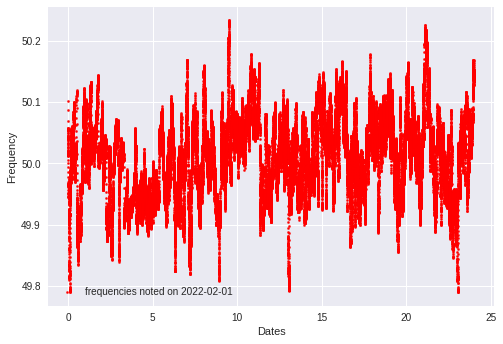

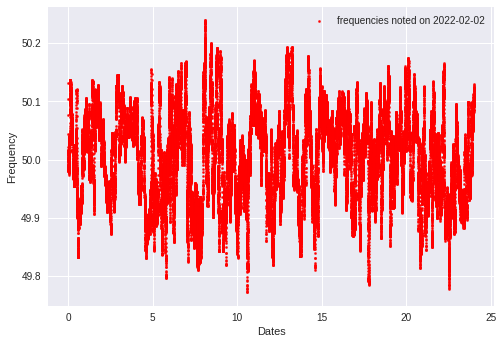

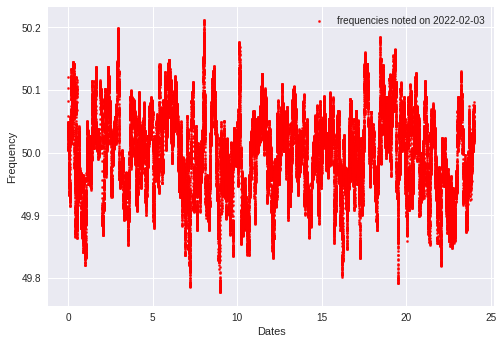

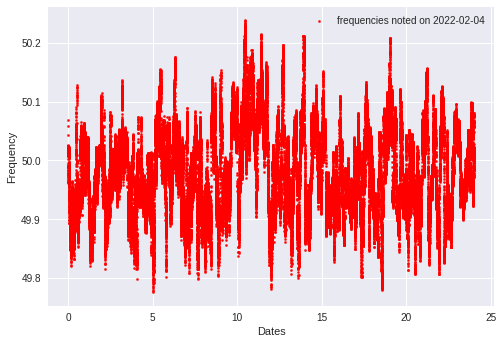

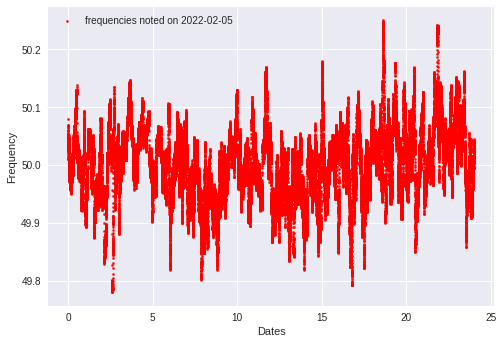

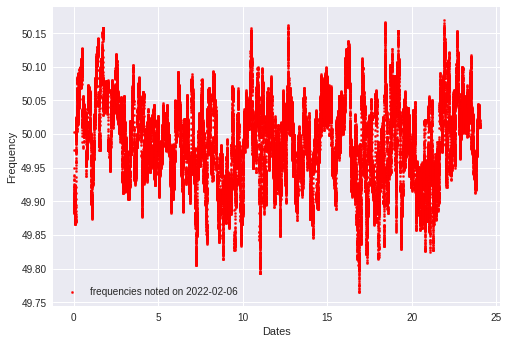

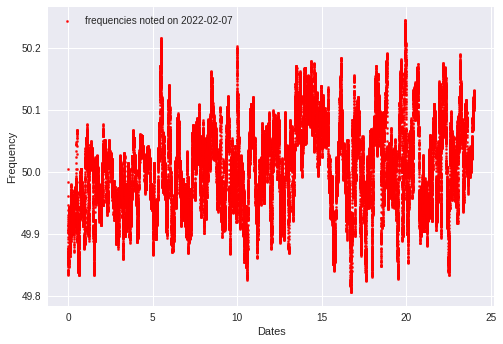

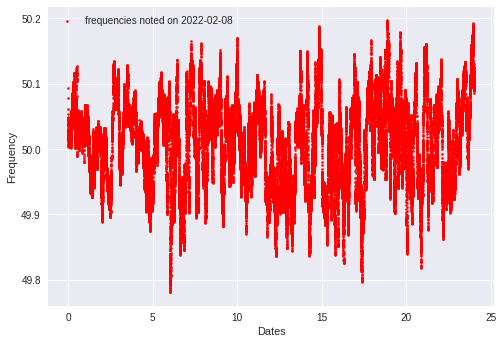

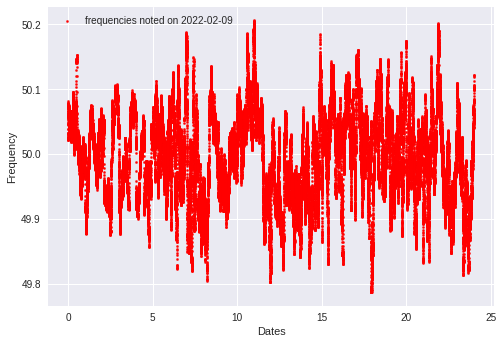

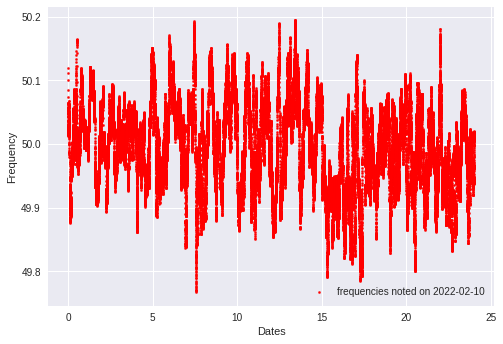

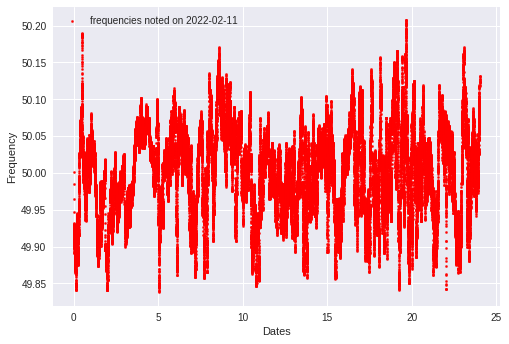

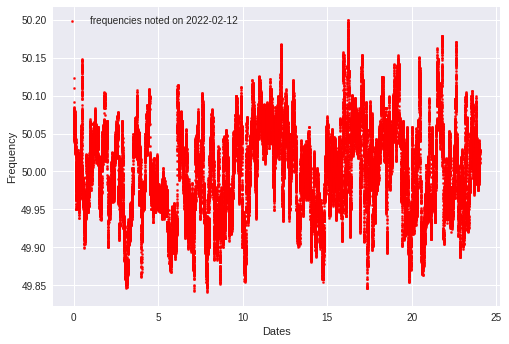

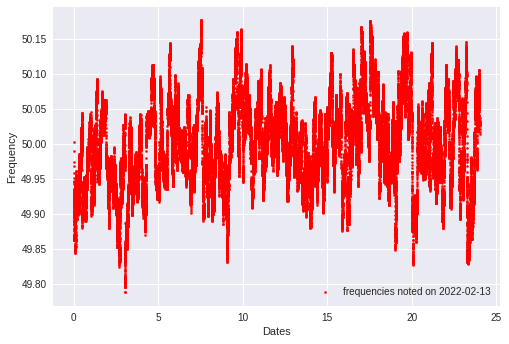

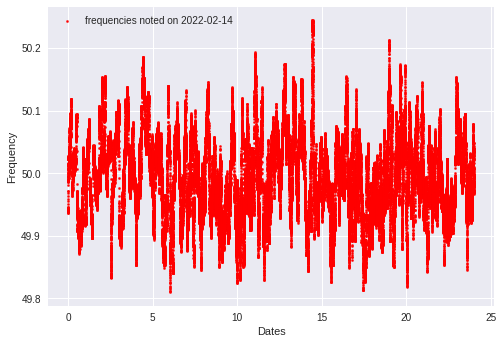

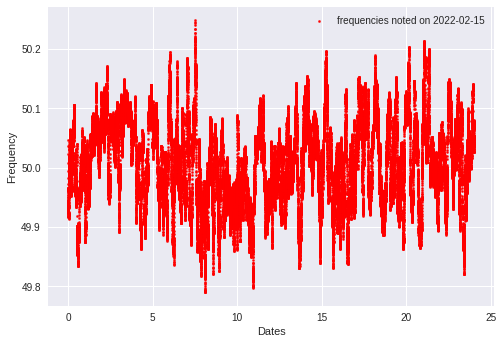

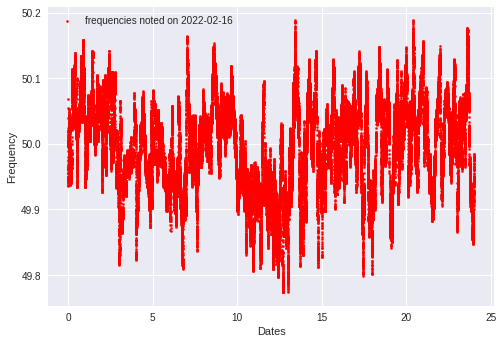

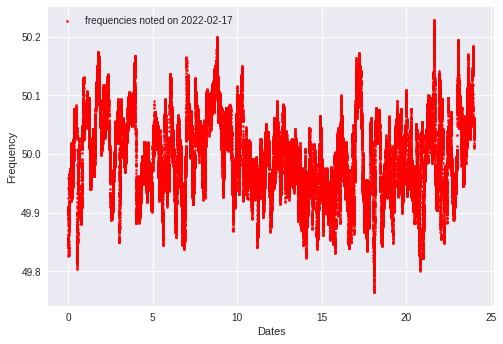

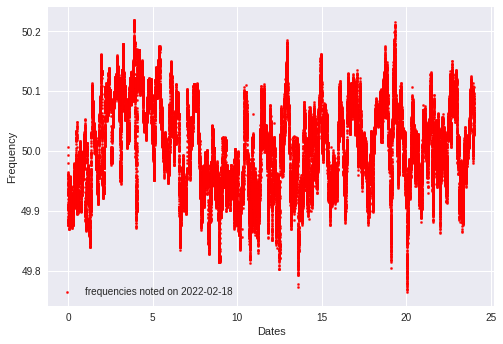

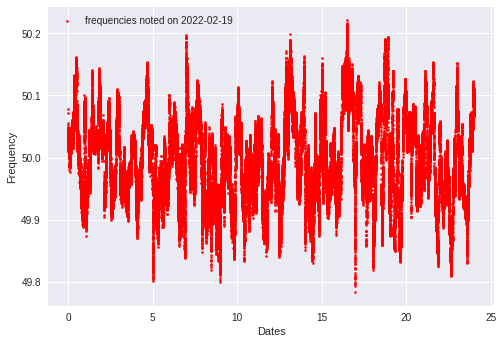

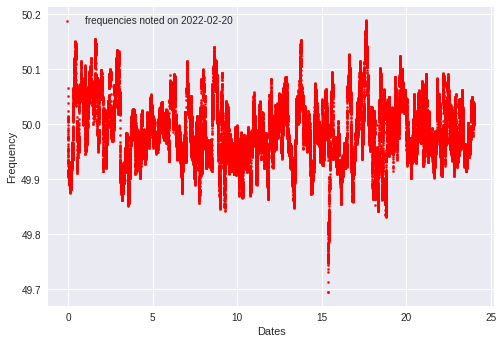

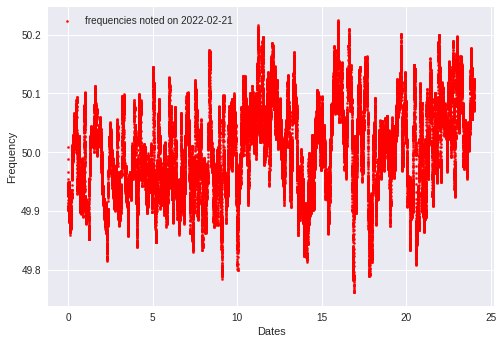

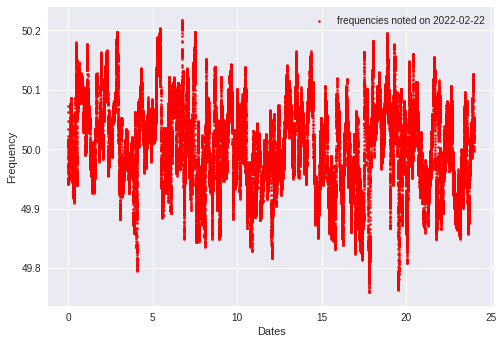

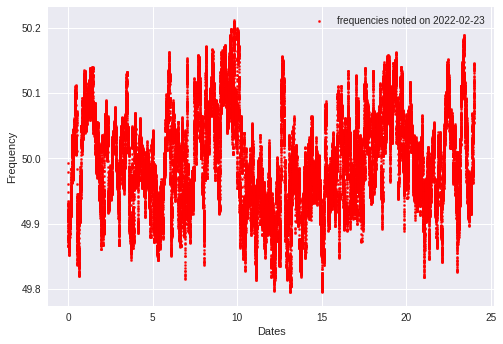

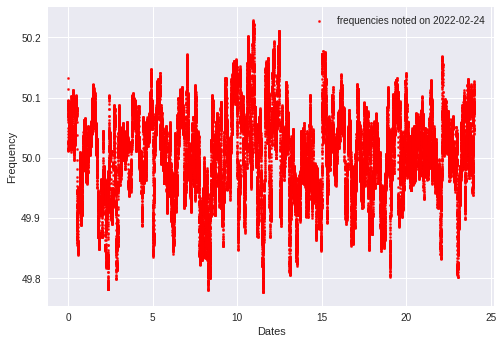

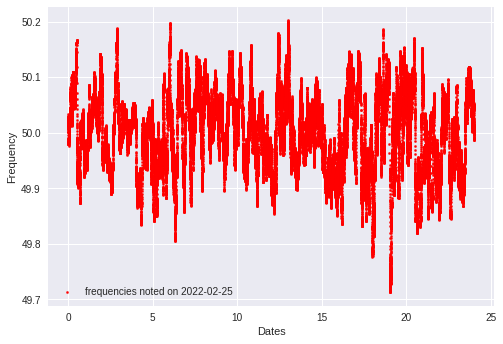

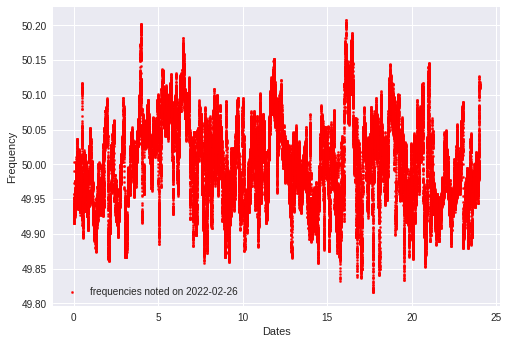

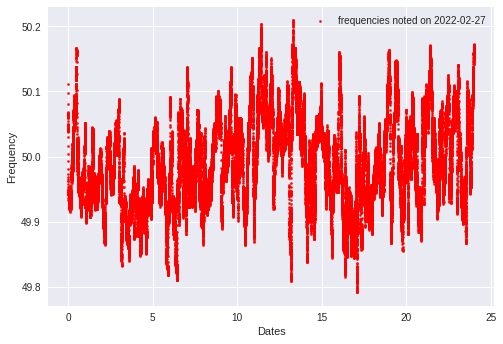

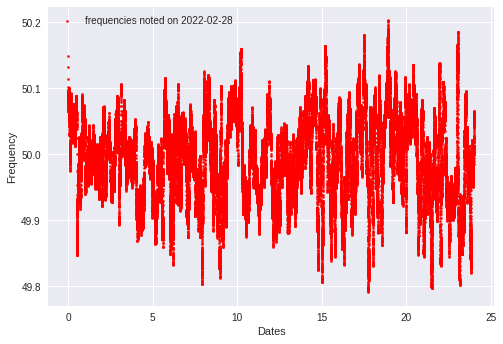

In [ ]:
for i in no_of_dates:
  try:
    dataset_sorted = df.groupby(['Date']).
    



    
    plt.scatter([x for x in np.linspace(0, 24.0, num=len(dataset_sorted['f']))], dataset_sorted['f'], marker = 'o', s = 5, color = 'red')
    plt.legend([f'frequencies noted on 2022-02-{i}'])
    plt.xlabel('Dates')
    plt.ylabel('Frequency')
    plt.show()
    # print(df['f'].describe().transpose())
  except:
    KeyError
